In [1]:
import pandas as pd
import numpy as np
import time
import random

random.seed(1)

user_income = pd.read_csv('nov_us_incomes.csv',index_col = 0)
user_income

,BR_TYPE,PLATFORM,GEO_REGION,GEO_LATITUDE,GEO_COUNTRY,GEO_LONGITUDE,size,id,State_Code,State_Name,...,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,dist_est
USER_ID,,,,,,,,,,,,,,,,,,,,,
75,Browser,web,CA,37.7083,US,-122.1282,86,6028979.0,6.0,California,...,510.0,22310824.0,0.0,37.512529,-122.047379,58205.0,41204.0,50685.0,427.055008,0.962068
83,Browser,web,CA,37.7587,US,-122.4381,37,602669.0,6.0,California,...,916.0,7898800.0,0.0,38.682534,-121.061749,143603.0,141296.0,75422.0,488.723865,0.614223
96,Browser,web,CA,37.3306,US,-121.8367,4,6027359.0,6.0,California,...,530.0,3412378.0,150797.0,40.599283,-122.369043,53556.0,42181.0,45216.0,1063.434237,0.559627
99,Browser,web,CA,37.7484,US,-122.4156,8,60226379.0,6.0,California,...,415.0,372758.0,0.0,37.761400,-122.506147,86178.0,77456.0,67770.0,333.512707,0.343789
106,Browser,web,CA,37.5550,US,-122.2687,5,60227509.0,6.0,California,...,805.0,2823954.0,0.0,34.434890,-119.737748,80178.0,66316.0,62155.0,508.471876,1.065193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289963,Browser,web,TX,29.7686,US,-95.5044,1,480215848.0,48.0,Texas,...,281.0,16291240.0,0.0,30.358347,-95.061744,39521.0,24465.0,44792.0,315.326501,0.760996
4296305,Browser,mob,NY,42.7128,US,-74.9173,8,360216584.0,36.0,New York,...,718.0,1038703.0,144963.0,40.602727,-73.764380,61725.0,44874.0,48201.0,336.916337,6.379539
583238,Browser,web,NC,35.7721,US,-78.6386,1,37023754.0,37.0,North Carolina,...,336.0,226316215.0,1678463.0,35.943859,-80.642068,47694.0,39297.0,34780.0,458.623097,0.889016


In [2]:
#how far is too far? Only 9% of the data is more than 5km away from the estimate
#drop those more than 5km away
a = [print('% Above',i,'km: ', (user_income['dist_est'] >= i).mean()) for i in range(1,6)]

% Above 1 km:  0.5454287597293712
% Above 2 km:  0.2755174398718601
% Above 3 km:  0.17160400103446263
% Above 4 km:  0.11918010494790146
% Above 5 km:  0.09004830273048077


In [3]:
incomes = user_income[user_income['dist_est'] <= 5]

In [50]:
import seaborn as sns

brackets = pd.cut(incomes['Mean'], bins = [0,20000,40000,60000,80000,100000,1000000]).value_counts().sort_index()
brackets

(0, 20000]            3442
(20000, 40000]        9623
(40000, 60000]       29167
(60000, 80000]       26662
(80000, 100000]      16581
(100000, 1000000]    17519
Name: Mean, dtype: int64

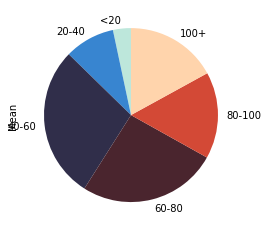

In [71]:
from matplotlib import pyplot as plt

brackets.plot.pie(startangle=90, 
                  labels = ['<20','20-40','40-60','60-80','80-100','100+'], 
                  colormap = 'icefire')

In [68]:
inc_points = pd.read_csv('incomes/kaggle_income.csv')